# Assignment Sheet 1
## Solution examples

## Task 1.1) 
Given is a six-armed bandit, as introduced in the lecture.

The first arm shall sample its reward uniformly from the interval $[1, 3)$.

The second arm shall sample its reward uniformly from $[-3, 8)$.

The third arm shall sample its reward uniformly from the interval $[2, 5)$.

The fourth arm shall sample its reward uniformly from $[–2, 6)$.

The fifth arm shall sample its reward uniformly from $[3, 4)$.

The sixth arm shall sample its reward uniformly from $[-2, 2)$.

### What is the expected reward when actions are chosen uniformly?

First, we calculate the expected value of each arm individually:

Arm 1: $0.5\cdot(1+3)=2$

Arm 2: $0.5\cdot(-3+8)=2.5$

Arm 3: $0.5\cdot(2+5)=3.5$

Arm 4: $0.5\cdot(-2+6)=2$

Arm 5: $0.5\cdot(3+4)=3.5$

Arm 6: $0.5\cdot(-2+2)=0$

Clearly, pulling arm 3 and 5 are both an optimal action.

Finally, we form the expectation over sampling these arms uniformly:

$\frac{1}{6}\cdot2 + \frac{1}{6}\cdot2.5 + \frac{1}{6}\cdot3.5 + \frac{1}{6}\cdot2 + \frac{1}{6}\cdot3.5 + \frac{1}{6}\cdot0 = 2.25$

## Task 1.2)
Implement the six-armed bandit from $\textbf{1.1)}$ and compute the sample average reward for $10$
uniformly chosen actions.
### Compare this to your expectation from $\textbf{1.1)}$.

First import required packages and seed the random number generator

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2019)

Next, set up the $6$-armed bandit framework. Each function represents an arm and returns a uniformily distributed reward according to the specifications on the assignment sheet.

In [2]:
def arm1(k = 0):
    return np.random.uniform(1,3)
def arm2(k = 0):
    return np.random.uniform(-3,8)
def arm3(k =0):
    return np.random.uniform(2,5)
def arm4(k = 0):
    if k <= 2000:
        return np.random.uniform(-2,6)
    else:
        return np.random.uniform(5,7)
def arm5(k = 0):
    return np.random.uniform(3,4)
def arm6(k = 0):
    return np.random.uniform(-2,2)

arm = [arm1, arm2, arm3, arm4, arm5, arm6]

This is naturally zero-indexed, such that the first arm, for example, corresponds to $arm[0]$. We can sample a reward from arm $i$ by calling $arm[i]()$. The fourth arm already satisfies the changes to be implemented in $\textbf{1.4)}$. If we decide to pass the iteration number to this function specifically, it will change the distribution of rewards obtained from this arm.
We can now execute the experiment in $\textbf{1.2)}$. Since subsequent arm selections are independent of each other, we can go ahead and select the arms we are going to sample before sampling them. 

In [3]:
NUM_SAMPLES = 10
armSelections = np.random.randint(0,6,(NUM_SAMPLES)) #Select NUM_SAMPLES arms at random
experiment = np.array([arm[selection]() for selection in armSelections]) #Pull each arm, save the reward
print(np.average(experiment)) #Print resulting average

1.9532863445383566


For a sample size of $10$, the resulting sample average is not very stable. To confirm our results from task $1$, we redo the experiment with a sample size of $1$ million. 

In [4]:
NUM_SAMPLES = 1000000
armSelections = np.random.randint(0,6,(NUM_SAMPLES))
experiment = np.array([arm[selection]() for selection in armSelections])
print(np.average(experiment))

2.2500070699997945


As expected by law of large numbers, the average now closely resembles to our analytical result. 

Purely out of interest, we show the distribution of rewards. It reflects the overlap of the supports of the uniform distributions from the assignment sheet. 

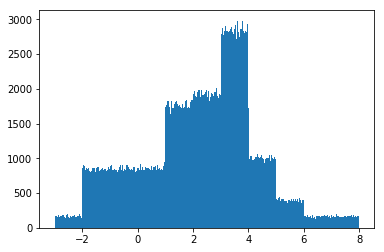

In [5]:
plt.hist(experiment, bins = int(NUM_SAMPLES/1000))
plt.show()

## Task 1.3) 
Initialize $Q(a_i)=0$ and chose $4000$ actions according to an $\epsilon$-greedy selection strategy ($\epsilon=0.1$).

Update your action values by computing the sample average reward of each action recursively.
For every $100$ actions show the percentage of choosing arm $1$, arm $2$, arm $3$, arm $4$, arm $5$, and
arm $6$ as well as the resulting average reward. 

In [6]:
NUM_ITER = 4000

Q = np.zeros(6) #initialize Q with 0
count = np.zeros(6) #this array counts how many times we selected each arm
countPrev = count.copy() #using this array we can calculate how often each arm was selected in the last 100 steps
rewards = np.empty(NUM_ITER) #here we can save the reward we get each iteration
selectPercentage = np.empty((6,int(NUM_ITER/100)),'float') #here we can save the percentage of selecting each arm


for t in range(NUM_ITER):
    eps = np.random.uniform() #rollout a number to compare to epsilon
    if eps < 0.1: #this is true with probability epsilon
        a = np.random.randint(0,6) #exploratory action
    else:
        a = np.argmax(Q) #exploitative action
    count[a] += 1 #increase the count for that arm
    reward = arm[a]() #sample that arm
    Q[a] += (reward-Q[a])/count[a] #update the Q value of that arm
    
    rewards[t] = reward #save the reward for later plotting
    
    
    if t > 0 and (t+1)%100 == 0: #save the arm selection proportions for later plotting
        for a in range(6):
            selectPercentage[a][int(t/100)] = 0.01*(count[a] - countPrev[a])
        countPrev = count.copy()

Note that we follow lecture $2$, slide $38$ and update $Q$ according to

$Q_{t+1} = Q_{t} + \frac{1}{t+1}\cdot(r_{t+1} - Q_t)$.

In our case, the target's weight $\frac{1}{t+1}$ is represented by $\frac{1}{count[a]}$, which we increment before using it in the update.

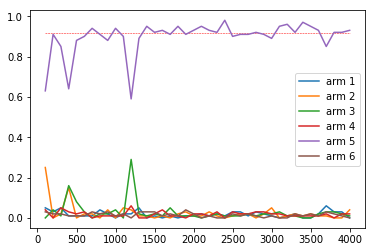

In [7]:
plt.plot(np.arange(100,NUM_ITER+1,100), (0.9+0.1/6)*np.ones_like(selectPercentage[0]),'r--', linewidth = 0.5)
for a in range(6):
    plt.plot(np.arange(100,NUM_ITER+1,100), selectPercentage[a], label = "arm " + str(a+1))
plt.legend()
plt.show()

If learning was successful, our agent should select the optimal action with a probability of $1-\epsilon$. In the remaining exploratory actions, the optimal action can be selected with a probability $\epsilon \cdot \frac{1}{6}$. The sum of this should be the percentage of selecting the optimal action. Note that we focus on arm $5$ here, disregarding that arm $3$ is equivalently rewarding. 

In the above plot, we plot this expectation as a baseline (dashed red line). After some iterations, We can see that arm $5$ is selected more or less exactly as often as we believed it would. The percentage drops only twice, each time the share of arm $3$ rises accordingly. 

Below, we plot the running reward. Given $r$, the rewards vector from our code, the running reward $r_{running}$ is given by

$r_{running}[t] = \frac{1}{t+1}\cdot\sum_{i=0}^{t} r[i]$.

It is simply the average over the rewards up until that iteration. I prefer showing this number as it moves more slowly than, for example, the average reward over the last $100$ steps, which is very jittery and harder to interpret.

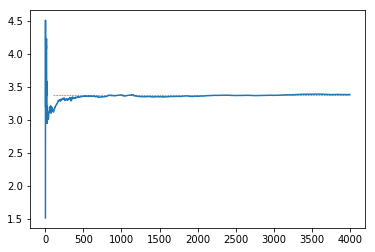

In [8]:
optReward = 3.38
plt.plot(np.arange(100,NUM_ITER+1,100), optReward*np.ones_like(selectPercentage[0]),'r--', linewidth = 0.5)
runningAverage = np.divide(np.cumsum(rewards),np.arange(1,NUM_ITER+1))
plt.plot(np.arange(1,NUM_ITER+1), runningAverage)
plt.show()

After learning has converged, our agent should select the most rewarding action $90\%$ of the time. In these cases, we expect a reward of $3.5$. The remaining actions are exploratory, and thus yield an expected reward of $2.25$ as calculated in $\textbf{1.1)}$. In summary, we therefore predict the running average should converge to $0.9\cdot3.5+0.1\cdot2.25\approx3.38$. We plot this value as a baseline (in dashed red) and see that our agent quickly stabilizes around it.

In [9]:
print(Q)

[ 1.96126771  3.13358571  3.44872751  1.89829282  3.5042345  -0.10124845]


Note that the individual expectations from $\textbf{1.1)}$ are not found yet. This is due to the low probability of exploratory actions. While arm $5$ has been greedily sampled several thousand times, the other arms have only been tested tens of times. Considering this, it is not very surprising that the agent has found the expected return of arm $5$ almost exactly, but is still relatively clueless regarding the other arms. 

## Task 1.4)
Redo the experiment, but after $2000$ steps sample the rewards of the fourth arm uniformly from $[5, 7)$.

Compare updating action values by computing the sample average reward of each action
recursively (as done in $\textbf{1.3)}$) with using a constant learning rate $\alpha=0.01$.
For every $100$ actions show the percentage of choosing arm $1$, arm $2$, arm $3$, arm $4$, arm $5$, and
arm $6$ as well as the resulting average reward. 

In [10]:
Q = np.zeros(6)
count = np.zeros(6)
countPrev = count.copy()


for t in range(NUM_ITER):
    eps = np.random.uniform()
    if eps < 0.1:
        a = np.random.randint(0,6)
    else:
        a = np.argmax(Q)
    count[a] += 1
    reward = arm[a](t) #the only difference in the code compared to above: t, the iteration, is passed to the arm
    Q[a] += (reward-Q[a])/count[a]
    
    rewards[t] = reward
    
    
    if t > 0 and (t+1)%100 == 0:
        for a in range(6):
            selectPercentage[a][int(t/100)] = 0.01*(count[a] - countPrev[a])
        countPrev = count.copy()

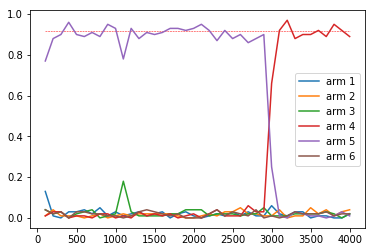

In [11]:
plt.plot(np.arange(100,NUM_ITER+1,100), (0.9+0.1/6)*np.ones_like(selectPercentage[0]),'r--', linewidth = 0.5)
for a in range(6):
    plt.plot(np.arange(100,NUM_ITER+1,100), selectPercentage[a], label = "arm " + str(a+1))
plt.legend()
plt.show()

After $2000$ iterations, the agent is slow to react to the massive improvement of the reward from arm $4$. Luckily, some $1000$ iterations later, we have sampled arm $4$ enough that $Q_4$ predicts $a_4$ is likely to be the optimal action. Consequently, we see arm $4$ ascending in probabilty after about $3000$ steps, and it is the greedy action from then on. 

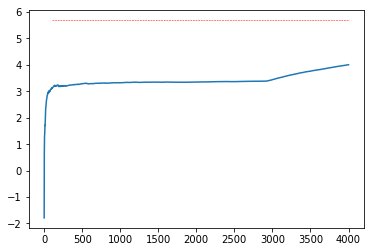

In [12]:
optReward = 5.69
plt.plot(np.arange(100,NUM_ITER+1,100), optReward*np.ones_like(selectPercentage[0]),'r--', linewidth = 0.5)
runningAverage = np.divide(np.cumsum(rewards),np.arange(1,NUM_ITER+1))
plt.plot(np.arange(1,NUM_ITER+1), runningAverage)
plt.show()

In the last task, we predicted the average reward our agent would converge to. In this case, this reward changes after $2000$ steps. Now, arm $4$ has an expected return of $6$, therefore the expected reward of exploring is now $(2 + 2.5 + 3.5 + 6 + 3.5+ 0)\cdot1/6\approx2.92$. Together with the reward for acting greedily, we expect our agent to arrive at $0.9\cdot6 + 0.1\cdot2.92\approx5.69$. We draw this line into our plot and observe that the agent has not reached it yet. However, the moving average is slow to adapt after $2000$ steps and after around $3000$ iterations we can see a tendency of our reward evolving towards this predicted line. Overall, I am confident that the agent would reach $5.69$ if we allowed it to play for a longer time and discounted the rewards from before iteration $2000$.

In [13]:
print(Q)

[2.01359817 2.88542712 3.464877   5.8880327  3.49697042 0.17668959]


This time, $Q$ looks pretty good across the board, but arm $4$ is still much lower than it should be. This is because $Q_4$ is still polluted by inadequate rewards from before iteration $2000$. This emphasizes the importance of modeling the underlying system states. 

Next, we redo the experiment with a constant step-size.

In [14]:
Q = np.zeros(6)
count = np.zeros(6)
countPrev = count.copy()

for t in range(NUM_ITER):
    eps = np.random.uniform()
    if eps < 0.1:
        a = np.random.randint(0,6)
    else:
        a = np.argmax(Q)
    count[a] += 1
    reward = arm[a](t)
    Q[a] += (reward-Q[a])*0.01 #Now the target is weighted by alpha, not by 1/count[a]
    
    rewards[t] = reward
    
    
    if t > 0 and (t+1)%100 == 0:
        for a in range(6):
            selectPercentage[a][int(t/100)] = 0.01*(count[a] - countPrev[a])
        countPrev = count.copy()

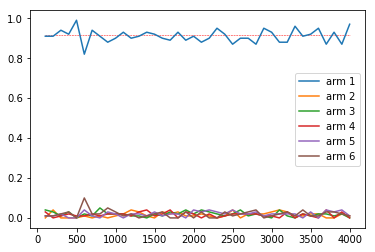

In [15]:
plt.plot(np.arange(100,NUM_ITER+1,100), (0.9+0.1/6)*np.ones_like(selectPercentage[0]),'r--', linewidth = 0.5)
for a in range(6):
    plt.plot(np.arange(100,NUM_ITER+1,100), selectPercentage[a], label = "arm " + str(a+1))
plt.legend()
plt.show()

Learning has not been successful even for the (uncomplicated) first $2000$ iterations. Since, compared to the average, $\alpha=0.01$ is a smaller step-size for all actions that have been sampled less than $100$ times, just a handful of 'unlucky' draws in exploratory turns can permanently scew the results. In this particular case, I suspect that arm $1$ sampled rather close to the upper bound of its reward interval at the very start of training and was consequently mistaken for the optimal action.

For different seeds of the random number generator, updating with a constant step-size worked quite often. I decided to keep this seed because this example is quite teachable. For maladjusted hyperparamaters (in this case $\alpha$), reinforcement learning has a tendency to fail even in simple toy problems. Nevertheless, we cannot expect this to outperform our previous experiment. As $0.01$ is a small step-size compared to most arm averages after $2000$ iterations but we require a quick shift towards arm $4$ when its reward is raised, our choice of $\alpha$ is not suitable. 

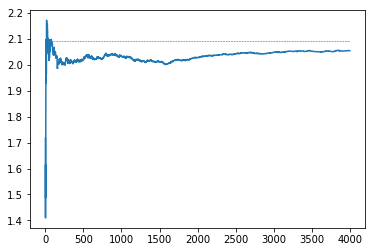

In [16]:
optReward = 2.09
runningAverage = np.divide(np.cumsum(rewards),np.arange(1,NUM_ITER+1))
plt.plot(np.arange(100,NUM_ITER+1,100), optReward*np.ones_like(selectPercentage[0]),'r--', linewidth = 0.5)
plt.plot(np.arange(1,NUM_ITER+1), runningAverage)
plt.show()

Here we just see the consequence of mistaking arm $1$ for the optimal action. The running average converges to $0.9 \cdot 2 + 0.1 \cdot 2.92 \approx 2.09$

In [17]:
print(Q)

[2.05721591 0.74074466 1.78903394 1.8796753  1.9115027  0.04086467]


Of course, $Q$ is wrong too, only $Q_1$ and $Q_6$ actually somewhat resemble the true expectations. 

## Task 1.5)
Modify your implementation by using an optimistic initialization $Q(a_i)=5$ and a $\textit{greedy}$ action
selection strategy, still using a constant learning rate $\alpha=0.01$.

For every $100$ actions show the percentage of choosing arm $1$, arm $2$, arm $3$, arm $4$, arm $5$, and
arm $6$ as well as the resulting average reward.
Compare this to your result from $\textbf{1.4)}$. 

In [18]:
Q = np.ones(6)*5
count = np.zeros(6)
countPrev = count.copy()


for t in range(NUM_ITER):
    eps = np.random.uniform()
    if eps < 0: #explore with probabilty 0
        a = np.random.randint(0,6)
    else:
        a = np.argmax(Q)
    count[a] += 1
    reward = arm[a](t)
    Q[a] += (reward-Q[a])*0.01
    
    rewards[t] = reward
    
    
    if t > 0 and (t+1)%100 == 0:
        for a in range(6):
            selectPercentage[a][int(t/100)] = 0.01*(count[a] - countPrev[a])
        countPrev = count.copy()

Note that the actions are now greedily selected. This means that there are no more explicitly exploratory actions!

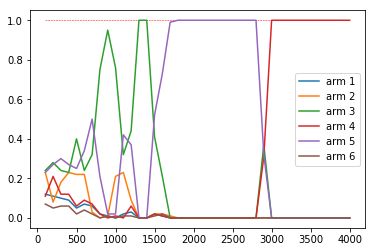

In [19]:
plt.plot(np.arange(100,NUM_ITER+1,100), np.ones_like(selectPercentage[0]),'r--', linewidth = 0.5)
for a in range(6):
    plt.plot(np.arange(100,NUM_ITER+1,100), selectPercentage[a], label = "arm " + str(a+1))
plt.legend()
plt.show()

The optimistic initialization of $Q$ works really well in this case. After less than $1000$ iterations, the agent is oscillating between the two optimal actions $a_3$ and $a_5$. Also, the agent is a bit quicker in discovering the change in the return of arm $4$. Compared to $\textbf{1.4)}$, we are marginally quicker in changing to exploiting arm $4$ after step $2000$. 

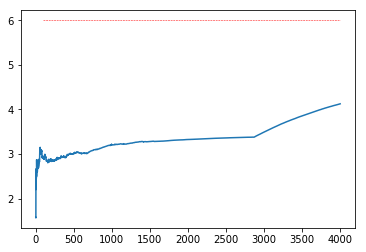

In [20]:
optReward = 6.
plt.plot(np.arange(100,NUM_ITER+1,100), optReward*np.ones_like(selectPercentage[0]),'r--', linewidth = 0.5)
runningAverage = np.divide(np.cumsum(rewards),np.arange(1,NUM_ITER+1))
plt.plot(np.arange(1,NUM_ITER+1), runningAverage)
plt.show()

Since we are now choosing greedily, we should end up with an average reward of $6$ at some point. The reason is that we have correctly identified the optimal action and it has a return of $6$.

In [21]:
print(Q)

[3.45660532 3.44671068 3.45344384 5.9984447  3.4545456  3.44921665]


The $Q$-values did not move much below the expected returns of arms $3$ and $5$. This is because they likely stabilized after these actions where extensively tested in the first $2000$ iterations. Having fallen slightly below $3.5$ on the way to their true expectations, the other arms were simply not sampled often afterwards. Of course, 'unlucky' draws can temporarily decrease $Q$ for arms $5$ and $3$, such that other arms are tested. This way, a low reward from arm $5$ likely led to a short spike in activity for arm $3$ before another 'bad' draw for arm $3$ had the agent completely change to arm $4$, where it stayed due to consitently high rewards.

Note that $5$ was not arbitrarily selected as an init for $Q$. Of course, we knew that it is likely to work for this problem, since we already knew what $Q$ is supposed to look like! Please do not consider the exploitation vs exploration dilemma solved because of the results in this task!